<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [11]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 2

Given N indepdent distributions $X_1$ to $X_N$ of a random variable with mean $\mu$ and standard deviation $\sigma$, the central limit theorem says that the distribution $\bar{X}=\frac{1}{N}\sum_{i=1}^n X_i$ approaches a Gaussian with mean $\mu$ and standard deviation $\sigma/\sqrt{N}$.

## Part 1

We choose 10000 data points as an appropriate number of measurements for our uniform distributions (between -0.5 and 0.5) $X_i$.

In [3]:
num_datapoints = 10000

Below we show a histogram and density plot of a single distribution $X_i$. 

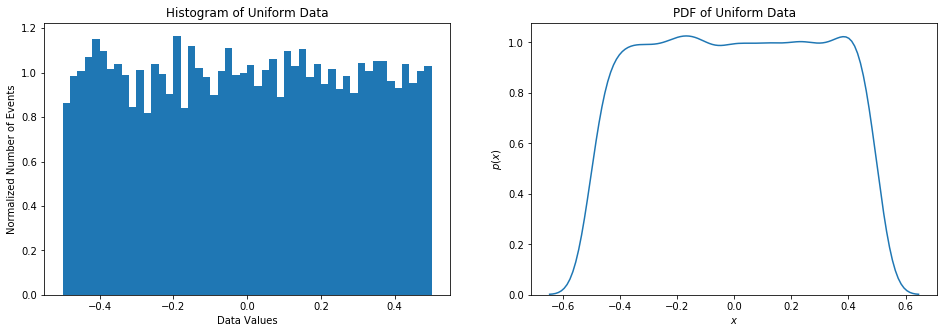

In [9]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(np.random.rand(num_datapoints)-0.5, bins=50,
         normed=True, stacked=True) #normed and stacked normalize
sns.distplot(np.random.rand(num_datapoints)-0.5, hist=False, ax=ax2)

ax1.set_title('Histogram of Uniform Data')
ax1.set_xlabel('Data Values')
ax1.set_ylabel('Normalized Number of Events')

ax2.set_title('PDF of Uniform Data')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p(x)$')

plt.show()

## Part 2

This function returns a distribution  $\hat{X}=\frac{1}{\sqrt{N}}\sum_{i=1}^n X_i= \sqrt{N} \bar{X}$ which should be Gaussian and have a standard deviation $\sigma$ for large $N$

In [5]:
def get_mean_distribution(N):
    s = np.random.rand(num_datapoints)-0.5
    for i in range(N-1):
        s = s + np.random.rand(num_datapoints)-0.5
    return s/np.sqrt(N)

For the following distribution $N=2$, which is small. The resulting distribution should be less uniform and approaching the shape of a Gaussian, but not quite Gaussian.

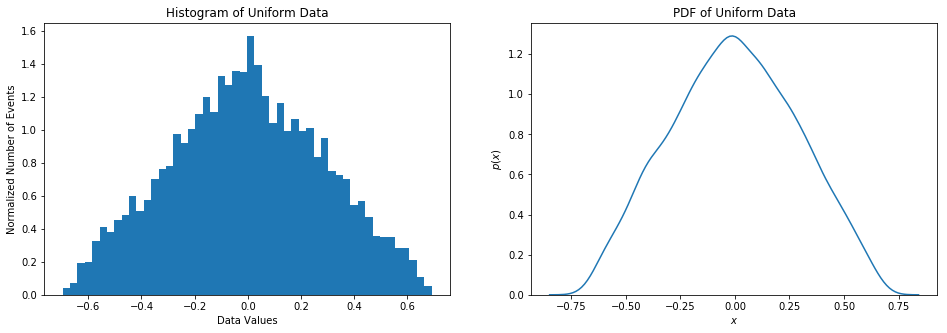

In [8]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(get_mean_distribution(2), bins=50, normed=True, stacked=True)
sns.distplot(get_mean_distribution(2), hist=False, ax=ax2)

ax1.set_title('Histogram of Uniform Data')
ax1.set_xlabel('Data Values')
ax1.set_ylabel('Normalized Number of Events')

ax2.set_title('PDF of Uniform Data')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$p(x)$')

plt.show()

## Part 3

Now we can see what happens as $N$ gets large. Below we show plots for $N=4$, $N=8$, and $N=16$.

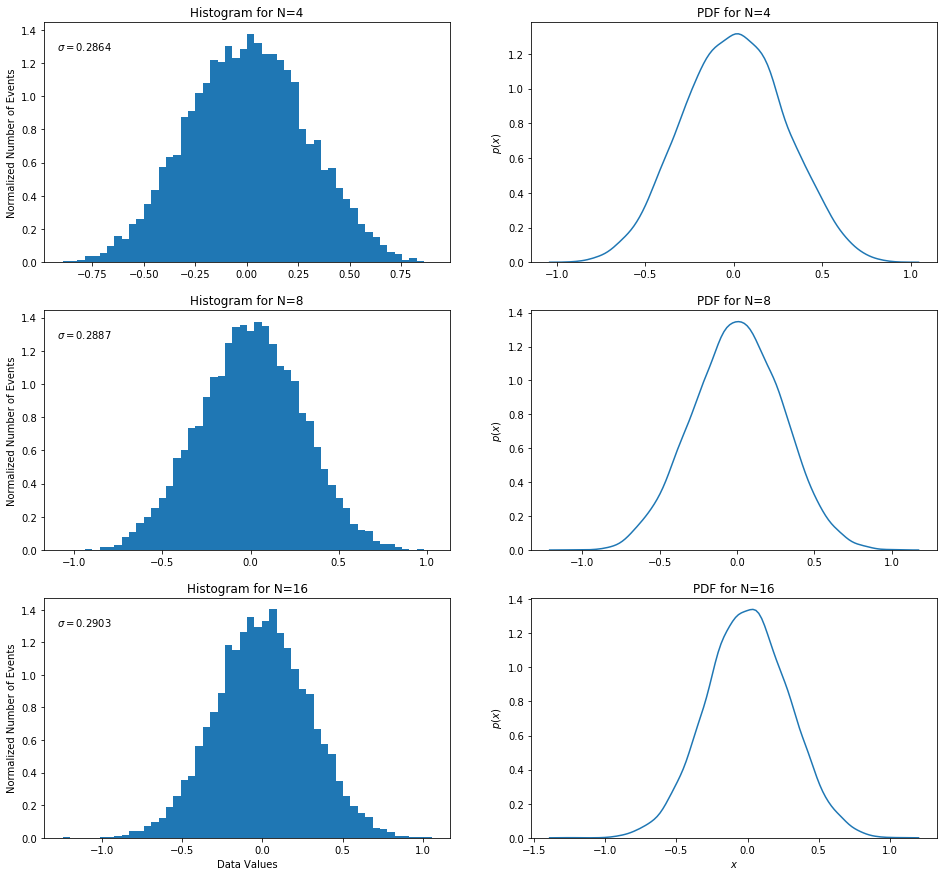

In [7]:
fig, axes = plt.subplots(3,2, figsize=(16,15))

# N=4 Case
N4_dist = get_mean_distribution(4)
axes[0,0].hist(N4_dist, bins=50, normed=True, stacked=True)
sns.distplot(N4_dist, hist=False, ax=axes[0,1])

std_dev_N4 = "{:.4f}".format(np.std(N4_dist))
axes[0,0].text(0.1, 0.9,'$\sigma={}$'.format(std_dev_N4), ha='center', va='center', transform=axes[0,0].transAxes)

# N=8 Case
N8_dist = get_mean_distribution(8)
axes[1,0].hist(N8_dist, bins=50, normed=True, stacked=True)
sns.distplot(N8_dist, hist=False, ax=axes[1,1])

std_dev_N8 = "{:.4f}".format(np.std(N8_dist))
axes[1,0].text(0.1, 0.9,'$\sigma={}$'.format(std_dev_N8), ha='center', va='center', transform=axes[1,0].transAxes)

# N=16 Case
N16_dist = get_mean_distribution(16)
axes[2,0].hist(N16_dist, bins=50, normed=True, stacked=True)
sns.distplot(N16_dist, hist=False, ax=axes[2,1])

std_dev_N16 = "{:.4f}".format(np.std(N16_dist))
axes[2,0].text(0.1, 0.9,'$\sigma={}$'.format(std_dev_N16), ha='center', va='center', transform=axes[2,0].transAxes)

#Some labels
axes[0,0].set_title('Histogram for N=4')
axes[0,1].set_title('PDF for N=4')
axes[1,0].set_title('Histogram for N=8')
axes[1,1].set_title('PDF for N=8')
axes[2,0].set_title('Histogram for N=16')
axes[2,1].set_title('PDF for N=16')

axes[2,0].set_xlabel('Data Values')
for i in range(3):
    axes[i,0].set_ylabel('Normalized Number of Events') 
    
axes[2,1].set_xlabel('$x$')
for i in range(3):
    axes[i,1].set_ylabel('$p(x)$') 


plt.show()

There are a few peculiarities about these plots. 

(i) The distributions become more Gaussian as $N$ gets larger. It is predicted that $\bar{X}$ is becomes Gaussian by the central limit theorem, so the distribution $\hat{X} = \sqrt{N}\bar{X}$ should also become Gaussian.

(ii) It can be shown that the standard deviation for the uniform distribution is $\sigma = 1/\sqrt{12}$. Since the standard deviation for $\bar{X}$ is $\sigma/\sqrt{N}$ <i> for large N </i> (by the central limit theorem), the standard deviation for $\hat{X}=\sqrt{N}\bar{X}$ should be $\sigma=1/\sqrt{12}$ for large $N$. On the plots above, $\sigma$ appears to be constant <i> for all $N$. </i>